In [155]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [156]:
# Import CDC Wonder mortality data into pandas from CSV
mortality_df = pd.read_csv('Resources/county_data.csv')
mortality_df

,version https://git-lfs.github.com/spec/v1
0,oid sha256:e0f4faebfdee6305b136ec91a2ec9ac38e7...
1,size 122052


In [125]:
mortality_df[["county", "state"]] = mortality_df['County'].str.split(',', expand=True)
del mortality_df['County Code']
mortality_df

,County,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval,Age Adjusted Rate Standard Error,% of Total Deaths,county,state
0,"Autauga County, AL",520,55416,938.36,857.7,1019.01,41.15,884.39,807.04,961.73,39.46,0.02%,Autauga County,AL
1,"Baldwin County, AL",1974,208563,946.48,904.72,988.23,21.3,716.92,684.42,749.41,16.58,0.07%,Baldwin County,AL
2,"Barbour County, AL",256,25965,985.94,865.16,1106.72,61.62,800.68,700.55,900.8,51.08,0.01%,Barbour County,AL
3,"Bibb County, AL",239,22643,1055.51,921.69,1189.33,68.28,927.67,808.06,1047.28,61.03,0.01%,Bibb County,AL
4,"Blount County, AL",697,57704,1207.89,1118.21,1297.56,45.75,989.37,914.2,1064.54,38.35,0.03%,Blount County,AL
5,"Bullock County, AL",133,10362,1283.54,1065.39,1501.68,111.3,1063.01,879.38,1246.65,93.69,0.00%,Bullock County,AL
6,"Butler County, AL",275,19998,1375.14,1212.61,1537.67,82.92,1014,888.87,1139.12,63.84,0.01%,Butler County,AL
7,"Calhoun County, AL",1404,114611,1225.01,1160.93,1289.09,32.69,1023.86,969.04,1078.68,27.97,0.05%,Calhoun County,AL
8,"Chambers County, AL",460,33843,1359.22,1235,1483.43,63.37,1015.77,920.25,1111.29,48.73,0.02%,Chambers County,AL
9,"Cherokee County, AL",361,25725,1403.3,1258.54,1548.07,73.86,1022.32,910.63,1134.02,56.99,0.01%,Cherokee County,AL


In [150]:
pop_mortality = mortality_df[["Deaths", "Population","Crude Rate",
                            "county", "state"]]
pop_mortality.head(10)

,Deaths,Population,Crude Rate,county,state
0,520,55416,938.36,Autauga County,AL
1,1974,208563,946.48,Baldwin County,AL
2,256,25965,985.94,Barbour County,AL
3,239,22643,1055.51,Bibb County,AL
4,697,57704,1207.89,Blount County,AL
5,133,10362,1283.54,Bullock County,AL
6,275,19998,1375.14,Butler County,AL
7,1404,114611,1225.01,Calhoun County,AL
8,460,33843,1359.22,Chambers County,AL
9,361,25725,1403.3,Cherokee County,AL


In [151]:
population_df = pop_mortality
population_df["Population"].unique()

array(['55416', '208563', '25965', ..., '8235', '7236', '323127513'],
      dtype=object)

In [152]:
# Sorting the DataFrame based on "Population" column
# Will sort from lowest to highest
population_df = population_df.loc[population_df["Population"] != "Missing"]
population_df["Population"] = population_df["Population"].astype(float)
population_df = population_df.sort_values("Population")
population_df

/Users/rohanmohindroo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Deaths,Population,Crude Rate,county,state
551,Suppressed,88.0,Suppressed,Kalawao County,HI
2676,Suppressed,113.0,Suppressed,Loving County,TX
2660,Suppressed,289.0,Suppressed,King County,TX
2656,Suppressed,404.0,Suppressed,Kenedy County,TX
1659,Suppressed,469.0,Suppressed,Arthur County,NE
1661,Suppressed,484.0,Suppressed,Blaine County,NE
1635,Suppressed,489.0,Suppressed,Petroleum County,MT
1715,Suppressed,493.0,Suppressed,McPherson County,NE
1714,Suppressed,591.0,Suppressed,Loup County,NE
97,Suppressed,601.0,Suppressed,Yakutat Borough,AK


In [153]:
population_df = population_df.loc[population_df["Deaths"] != "Suppressed"]
population_df["Deaths"] = population_df["Deaths"].astype(float)
population_df

/Users/rohanmohindroo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Deaths,Population,Crude Rate,county,state
1702,18.0,708.0,Unreliable,Hooker County,NE
287,10.0,732.0,Unreliable,Mineral County,CO
1754,16.0,790.0,Unreliable,Esmeralda County,NV
2747,11.0,812.0,Unreliable,Terrell County,TX
1619,14.0,831.0,Unreliable,Golden Valley County,MT
190,14.0,1071.0,Unreliable,Alpine County,CA
1655,17.0,1093.0,Unreliable,Wibaux County,MT
2784,10.0,1095.0,Unreliable,Daggett County,UT
2698,16.0,1160.0,Unreliable,Motley County,TX
1640,24.0,1182.0,2030.46,Prairie County,MT


In [154]:
population_df = population_df.dropna()
population_df

,Deaths,Population,Crude Rate,county,state
1702,18.0,708.0,Unreliable,Hooker County,NE
287,10.0,732.0,Unreliable,Mineral County,CO
1754,16.0,790.0,Unreliable,Esmeralda County,NV
2747,11.0,812.0,Unreliable,Terrell County,TX
1619,14.0,831.0,Unreliable,Golden Valley County,MT
190,14.0,1071.0,Unreliable,Alpine County,CA
1655,17.0,1093.0,Unreliable,Wibaux County,MT
2784,10.0,1095.0,Unreliable,Daggett County,UT
2698,16.0,1160.0,Unreliable,Motley County,TX
1640,24.0,1182.0,2030.46,Prairie County,MT


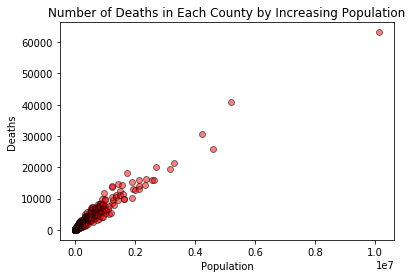

In [148]:
plt.title("Number of Deaths in Each County by Increasing Population")
plt.xlabel("Population")
plt.ylabel("Deaths")

plt.scatter(population_df["Population"], population_df["Deaths"], 
            marker="o", color="red", edgecolors="black", alpha=0.5)